In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import make_scorer


In [162]:
# CARREGA DATASET
df_train = pd.read_csv('C:\\Users\\Michele\\Desktop\\Maliciou\\Dataset\\Train\\train.csv', engine='python', sep=',')
df_test = pd.read_csv('C:\\Users\\Michele\\Desktop\Maliciou\\Dataset\\Test\\test.csv', engine='python', sep=',')

In [163]:
# DADOS DE TREINAMENTO E TESTE

X_train = df_train.drop(columns=['class', 'sub_class'], axis=1)
X_test = df_test.drop(columns=['class', 'sub_class'])

y_train = df_train['class']
y_test = df_test['class']

In [164]:
# DEFININDO O NÚMERO DOS K VIZINHOS
classifier = KNeighborsClassifier(n_neighbors=8)  

# TREINANDO O MODELO
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=8)

In [165]:
# CALCULANDO O VALOR DE ERRO DE K

error = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Média de Erro')

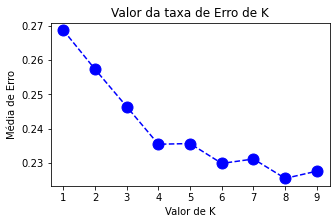

In [166]:
# GRÁFICO DO MELHOR VALOR DE K

plt.figure(figsize=(5, 3))  
plt.plot(range(1, 10), error, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=11)
plt.title('Valor da taxa de Erro de K')  
plt.xlabel('Valor de K')  
plt.ylabel('Média de Erro') 

In [167]:
# PREVENDO VALORES DE Y PARA OS DADOS DE TESTE (X_test)
y_pred = classifier.predict(X_test) 

In [168]:
#CROSS VALIDATION
results = cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy")

# imprime acuracia para cada um dos 5 fold
print(results)
# imprime media
print(np.mean(results))

[0.77211203 0.7693028  0.77168639 0.76436537 0.76562234]
0.7686177853467188


In [169]:
# LIMIAR DA CLASSIFICAÇÃO

threshold = 0.4
y_scores = classifier.predict_proba(X_test)[:, 1]
y_pred = [round(i - threshold + 0.5) for i in y_scores]


<AxesSubplot:>

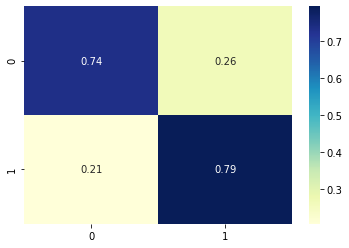

In [170]:
# MATRIZ DE CONFUSÃO

cm = confusion_matrix(y_test, y_pred, normalize='true')
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, cmap="YlGnBu", annot=True, fmt=".2f")

In [171]:
# RELATÓRIO DE CLASSIFICAÇÃO
print("RELATÓRIO DE CLASSIFICAÇÃO: \n", classification_report(y_test, y_pred)) 
cr = classification_report(y_test, y_pred, labels=[0,1], output_dict=True)

RELATÓRIO DE CLASSIFICAÇÃO: 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      7372
           1       0.75      0.79      0.77      7312

    accuracy                           0.76     14684
   macro avg       0.76      0.76      0.76     14684
weighted avg       0.76      0.76      0.76     14684



In [152]:
# Calculate: fpr and tpr (all thresholds of the classification)
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

0.8528085748785101


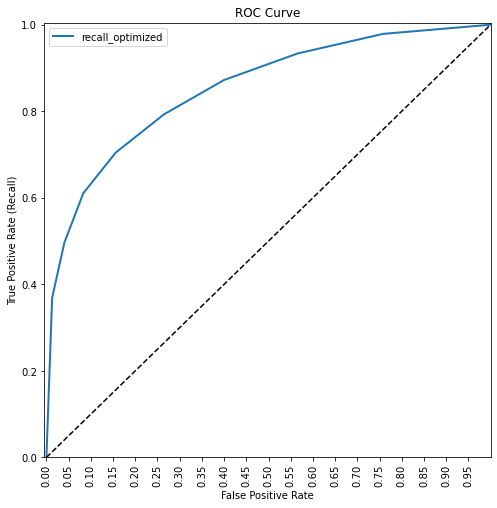

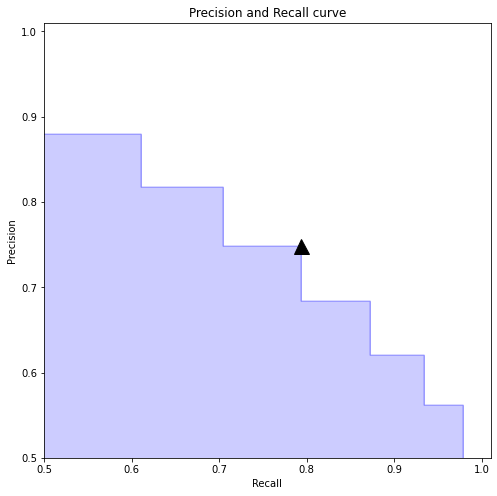

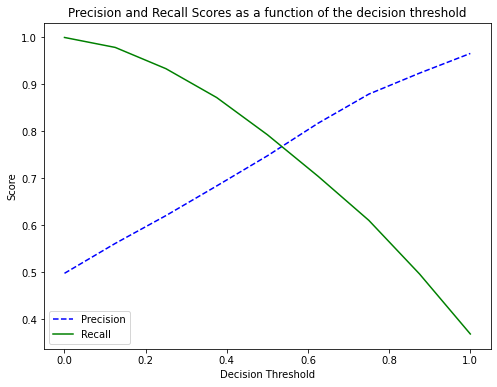

In [177]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

# Roc 

fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

# PR 
precision_recall_threshold(p, r, thresholds, 0.45)
plot_precision_recall_vs_threshold(p, r, thresholds)



0.8528085748785101


In [156]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.4):
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    
    y_pred_adj = adjusted_classes(y_scores, t)

    # plot the curve
    plt.figure(figsize=(8,6))
    plt.title("Precision and Recall curve")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.figure(figsize=(8, 6))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
def plot_roc_curve(fpr, tpr, label=None):

    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')  